# Project: Wrangling and Analyze Data

## Table of Contents


- <a href='#intro'>Introduction</a>
- <a href='#gather'>Gathering data</a>
- <a href='#assess'>Assessing data</a>
- <a href='#clean'>Cleaning data</a>
  - <a href='#quality'>Quality</a>
  - <a href='#tidy'>Tidiness</a>
- <a href='#store'>Storing, Analyzing, and Visualizing Data</a>
  - <a href='#in_1'>Insight 1</a>
  - <a href='#in_2'>Insight 2</a>
  - <a href='#in_3'>Insight 3</a>
- <a href='#visualize'>Visualize</a>

<a id='intro'></a>
## Introduction

## Import libraries

In [263]:
#import libraries

import pandas as pd
import numpy as np
import requests
import seaborn
import tweepy
import sys
import os
import matplotlib.pyplot as plt

<a id='gather'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [264]:
df_1 = pd.read_csv("twitter-archive-enhanced.csv", sep=',')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [265]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
folder = os.getcwd()
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

#os.listdir()    to confirm that file has been downloaded

In [266]:
df_2 = pd.read_csv("image-predictions.tsv", sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#### Appliaction for the twitter developer access is taking longer than usual, and the `tweet-api.py` script keeps failing. So i use the `tweet-json.txt` file provided

In [267]:
df_list = []
url = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
response = requests.get(url)
folder = os.getcwd()
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

##### load tweets data into pandas df
'''
with open('tweet-json.txt') as file:
    df_3 = pd.read_json(file, lines= True, encoding = 'utf-8')
'''

- extract retweet_count and favorite_count only

In [268]:
#!/usr/bin/python3

_author_ = "Regan"

import json
import pandas as pd


df_list = []

with open("tweet-json.txt", encoding='utf-8') as json_file:
    for tweet_id in json_file:
        tweet = json.loads(tweet_id)

        tweet_id        = tweet['id']
        retweet_count   = tweet['retweet_count']
        fav_count       = tweet['favorite_count']

        df_list.append({'tweet_id':tweet_id,
            'retweet_count':retweet_count, 'favorite_count':fav_count})

df_3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count','favorite_count'])

<a id='assess'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### df_1 -> `enhanced_archive`

In [269]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [270]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [271]:
#check to see length of non-null columns less than 25%
78/2356 * 100 < 25 and 181/2356 *100 < 25

True

- the columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweet_status_id`, `retweeted_status_id`, `retweeted_status_timestamp` have lower than 25% of non-null entries

In [272]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [273]:
df_1[df_1.duplicated()].sum()

tweet_id                      0.0
in_reply_to_status_id         0.0
in_reply_to_user_id           0.0
timestamp                     0.0
source                        0.0
text                          0.0
retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp    0.0
expanded_urls                 0.0
rating_numerator              0.0
rating_denominator            0.0
name                          0.0
doggo                         0.0
floofer                       0.0
pupper                        0.0
puppo                         0.0
dtype: float64

- clearly there no duplicates

In [274]:
df_1[df_1.isnull()].sum()

tweet_id                      0.0
in_reply_to_status_id         0.0
in_reply_to_user_id           0.0
timestamp                       0
source                          0
text                            0
retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp      0
expanded_urls                   0
rating_numerator              0.0
rating_denominator            0.0
name                            0
doggo                           0
floofer                         0
pupper                          0
puppo                           0
dtype: object

In [275]:
df_1[df_1.isna()].sum()

tweet_id                      0.0
in_reply_to_status_id         0.0
in_reply_to_user_id           0.0
timestamp                       0
source                          0
text                            0
retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp      0
expanded_urls                   0
rating_numerator              0.0
rating_denominator            0.0
name                            0
doggo                           0
floofer                         0
pupper                          0
puppo                           0
dtype: object

In [276]:
df_1.isnull().sum() == df_1.isna().sum()

tweet_id                      True
in_reply_to_status_id         True
in_reply_to_user_id           True
timestamp                     True
source                        True
text                          True
retweeted_status_id           True
retweeted_status_user_id      True
retweeted_status_timestamp    True
expanded_urls                 True
rating_numerator              True
rating_denominator            True
name                          True
doggo                         True
floofer                       True
pupper                        True
puppo                         True
dtype: bool

- number of null entries  == number of NaN entries
- programmatic and visual assessmnent in a spredsheet shows that they are actually null

In [277]:
names = list(df_1.name)
name_count = {name: names.count(name) for name in set(names)}
max(name_count.values())

745

we have 2356 entries and 957 unique name entries -> there are multiple dogs with the same names

In [278]:
df_1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [279]:
df_1.expanded_urls.isna() == df_1.expanded_urls.isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
2351    True
2352    True
2353    True
2354    True
2355    True
Name: expanded_urls, Length: 2356, dtype: bool

- expanded urls has Nan values and these entries are null

- invalid dog names

#### df_2 -> image_predictions

In [280]:
df_2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [281]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- clearly there are no null entries

In [282]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [283]:
df_2[df_2.duplicated()].sum()

tweet_id    0.0
jpg_url     0.0
img_num     0.0
p1          0.0
p1_conf     0.0
p1_dog      0.0
p2          0.0
p2_conf     0.0
p2_dog      0.0
p3          0.0
p3_conf     0.0
p3_dog      0.0
dtype: float64

In [284]:
df_2['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [285]:
df_2['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [286]:
df_2['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [287]:
df_2.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [288]:
df_2.jpg_url.duplicated().sum()

66

###### This shows that there are duplicate entries in `the jpg_url` column

##### df_3 -> `tweet-jason.txt`

In [289]:
df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [290]:
df_3.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [291]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


###### no null entries

In [292]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


###### `tweet_id` should be of Dtype string(object) not numeric

### Quality issues

#### `df_1`

1. Invalid name entries in `name` column e.g `None`, `a`, <em>et`al</em>..

2. Tweet_id should be of `string` Dtype not `int64`. (`df_1` and `df_3`).

3. The columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_id`, `retweeted_status_timestamp` have lower than 25% of non-null entries, all less representative.

4. `timestamp` should be of Dtype `datetime` instead of `object`.

5. Dog ratings are not standardized.

6. `Expanded_urls` has Nan values.

#### `df_2`

7. Remove duplicate entries in the jpg_url column.

8. `df_2`: Remove entries with `p1_dog == False`, `p2_dog == False` AND `p3_dog == False`. They are not dogs.

#### Additional Issues

9. dog_breed should have a separate column

### Tidiness issues
1. `df_1`: melt the four dog stages into one column. 

2. merge `df_1_clean`, AND `df_3_clean` into one dataFrame

<a id='clean'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [293]:
# Make copies of original pieces of data
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

<a id='quality'></a>
### Quality

#### `df_1`

#### Issue #1:

#### Define:

- fix naming issues in `name` column in `df_1` using regex type functionality in pandas

#### Code

In [294]:
df_1_clean.name = df_1_clean.name.str.replace('^[a-z]+', 'None')
df_1_clean = df_1_clean[df_1_clean['name'] !='None']

/tmp/ipykernel_5183/1718813683.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_1_clean.name = df_1_clean.name.str.replace('^[a-z]+', 'None')


#### Test

In [295]:
df_1_clean.name.value_counts(),df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1502 non-null   int64  
 1   in_reply_to_status_id       1 non-null      float64
 2   in_reply_to_user_id         1 non-null      float64
 3   timestamp                   1502 non-null   object 
 4   source                      1502 non-null   object 
 5   text                        1502 non-null   object 
 6   retweeted_status_id         111 non-null    float64
 7   retweeted_status_user_id    111 non-null    float64
 8   retweeted_status_timestamp  111 non-null    object 
 9   expanded_urls               1502 non-null   object 
 10  rating_numerator            1502 non-null   int64  
 11  rating_denominator          1502 non-null   int64  
 12  name                        1502 non-null   object 
 13  doggo                       1502 

(Charlie       12
 Lucy          11
 Cooper        11
 Oliver        11
 Lola          10
               ..
 Devón          1
 Gert           1
 Dex            1
 Ace            1
 Christoper     1
 Name: name, Length: 931, dtype: int64,
 None)

### Issue #2:

#### Define

- change `tweet_id` Dtype to `object`.

#### Code

In [296]:
df_1_clean.tweet_id = df_1_clean['tweet_id'].astype("string")
df_3_clean.tweet_id = df_3_clean['tweet_id'].astype("string")

#### Test

In [297]:
df_1_clean.tweet_id.dtype, df_3_clean.tweet_id.dtype

(string[python], string[python])

### Issue #3:

#### Define

- drop columns [`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_id`, `retweeted_status_timestamp`]

#### Code

In [298]:
df_1_clean.drop(['in_reply_to_status_id', 
                 'in_reply_to_user_id', 
                 'retweeted_status_id', 
                 'retweeted_status_user_id', 
                 'retweeted_status_timestamp'], axis = 1, inplace=True)

#### Test

In [299]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1502 non-null   string
 1   timestamp           1502 non-null   object
 2   source              1502 non-null   object
 3   text                1502 non-null   object
 4   expanded_urls       1502 non-null   object
 5   rating_numerator    1502 non-null   int64 
 6   rating_denominator  1502 non-null   int64 
 7   name                1502 non-null   object
 8   doggo               1502 non-null   object
 9   floofer             1502 non-null   object
 10  pupper              1502 non-null   object
 11  puppo               1502 non-null   object
dtypes: int64(2), object(9), string(1)
memory usage: 152.5+ KB


### Issue #4:

#### Define

- change `timestamp` Dtype to `datetime`.

#### Code

In [300]:
df_1_clean.timestamp = pd.to_datetime(df_1_clean.timestamp)

#### Test

In [301]:
df_1_clean.timestamp.dtype

datetime64[ns, UTC]

### Issue #5:

#### Define

- Standardize dog ratings

#### Code

In [302]:
df_1_clean['rating'] = df_1_clean['rating_numerator']/df_1_clean['rating_denominator']

#### Test

In [303]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1502 non-null   string             
 1   timestamp           1502 non-null   datetime64[ns, UTC]
 2   source              1502 non-null   object             
 3   text                1502 non-null   object             
 4   expanded_urls       1502 non-null   object             
 5   rating_numerator    1502 non-null   int64              
 6   rating_denominator  1502 non-null   int64              
 7   name                1502 non-null   object             
 8   doggo               1502 non-null   object             
 9   floofer             1502 non-null   object             
 10  pupper              1502 non-null   object             
 11  puppo               1502 non-null   object             
 12  rating              1502 non-null 

### Issue #6:

#### Define

- drop entries with expanded_urls == Nan

#### Code

In [304]:
#df_1_clean = df_1_clean[df_1_clean['expanded_urls'] != 'Nan']
df_1_clean = df_1_clean.loc[~df_1_clean.expanded_urls.isnull()]

#### Test

In [305]:
df_1_clean.expanded_urls.isna().sum()

0

### df_2

### Issue #7:

#### Define

- remove duplicate entries in column `jpg_url`.

#### Code

In [306]:
df_2_clean = df_2_clean.drop_duplicates(subset='jpg_url')

#### Test

In [307]:
df_2_clean.jpg_url.duplicated().sum()

0

### Issue #8:

#### Define

- drop entries with `p1_dog == False`, `p2_dog == False` AND `p3_dog == False`

#### Code

In [308]:
df_2_clean = df_2_clean[((df_2_clean['p1_dog'] != False) &
                       (df_2_clean['p2_dog'] != False) &
                       (df_2_clean['p3_dog'] != False))]

#### Test

In [309]:
df_2_clean[((df_2_clean['p1_dog'] == False) &
                       (df_2_clean['p2_dog'] == False) &
                       (df_2_clean['p3_dog'] == False))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


<a id='tidy'></a>
### Tidiness Issues

### Issue #9:

#### Define

- create `stage` column from `'doggo', 'floofer', 'pupper', 'puppo'`

#### Code

In [310]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']

# create the dog_stage column with joining the four columns in one column dog_stage join for more than stage
df_1_clean['dog_stage'] = df_1_clean[cols].apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan and change datatype to category
df_1_clean.dog_stage = df_1_clean.dog_stage.replace('', np.nan).astype('category')

# drop the 4 columns
df_1_clean = df_1_clean.drop(columns = cols, axis =1)

#### Test

In [311]:
df_1_clean.dog_stage.isnull().sum()

0

### Issue #10:

### Define

- merge df_1_clean and df_3_clean into one master table using the `tweet_id` as key and create a new dataFrame with `df_master['name'] != None`

#### Code

In [312]:
df_master =  pd.merge(df_1_clean, df_3_clean, on='tweet_id')
#df_master = pd.merge(df_master, df_2_clean, on='tweet_id')
#df_master = pd.concat([df_1_clean, df_2_clean, df_3_clean])
df_master = df_master[df_master['name'] != 'None']

### Test

In [313]:
df_master.info(), df_1_clean.info(), df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1501 entries, 0 to 1500
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1501 non-null   string             
 1   timestamp           1501 non-null   datetime64[ns, UTC]
 2   source              1501 non-null   object             
 3   text                1501 non-null   object             
 4   expanded_urls       1501 non-null   object             
 5   rating_numerator    1501 non-null   int64              
 6   rating_denominator  1501 non-null   int64              
 7   name                1501 non-null   object             
 8   rating              1501 non-null   float64            
 9   dog_stage           1501 non-null   category           
 10  retweet_count       1501 non-null   int64              
 11  favorite_count      1501 non-null   int64              
dtypes: category(1), datetime64[ns, UTC

(None, None, None)

<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [314]:
# Store the master_df DataFrame in a CSV file
df_master.to_csv('twitter_archive_master_1.csv', 
                 index = False, encoding = 'utf-8')
df_2_clean.to_csv('twitter_archive_master_2.csv',
                 index = False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### some good questions for analysis include;
- what is the correlation between the retweet_count and the fav_count
- what are the some the most popular dogs 
- which dog has the highest rating

In [315]:
def corr_plot(col1, col2):
    df_3_clean.plot(x=col1, y=col2, kind='scatter')

- This indicates a positive relationship i.e likes and retweets are directly proportional

In [316]:
def min_max(col_name):
    #for highest retweet
    high= df_master[f'{col_name}'].idxmax()
    high_details=pd.DataFrame(df_master.loc[high])

    #for lowest retweet
    low= df_master[f'{col_name}'].idxmin()
    low_details=pd.DataFrame(df_master.loc[low])

    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)

    return info


#### Check for dogs with `min` and `max` `retweet_count` (retweets)

In [317]:
min_max('retweet_count')

,173,1499
tweet_id,842892208864923648,666447344410484738
timestamp,2017-03-18 00:15:37+00:00,2015-11-17 02:46:43+00:00
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,RT @dog_rates: This is Stephan. He just wants ...,This is Scout. She is a black Downton Abbey. I...
expanded_urls,https://twitter.com/dog_rates/status/807106840...,https://twitter.com/dog_rates/status/666447344...
rating_numerator,13,9
rating_denominator,10,10
name,Stephan,Scout
rating,1.3,0.9
dog_stage,"None, None, None, None","None, None, None, None"


#### Check for dogs with `min` and `max` `rating`

In [318]:
min_max('rating')

,696,1186
tweet_id,749981277374128128,678424312106393600
timestamp,2016-07-04 15:00:45+00:00,2015-12-20 03:58:55+00:00
source,"<a href=""https://about.twitter.com/products/tw...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Atticus. He's quite simply America af....,This is Crystal. She's a shitty fireman. No se...
expanded_urls,https://twitter.com/dog_rates/status/749981277...,https://twitter.com/dog_rates/status/678424312...
rating_numerator,1776,2
rating_denominator,10,10
name,Atticus,Crystal
rating,177.6,0.2
dog_stage,"None, None, None, None","None, None, None, None"


In [319]:
df_master.rating

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
1496    0.8
1497    0.9
1498    1.0
1499    0.9
1500    1.0
Name: rating, Length: 1501, dtype: float64

### Insights:
1. <a id='in_1'>   
</a>
<ul>
    <li>- from the barplot we confirm tht like are far more than retweets.</li>
</ul>
2. <a id='in_2'></a>
<ul> 
    <li>The dog with the highest `retweet_count` is `Stephan` with `56625` retweets.</li>
    <li>The dog with the lowest `retweet_count` is `Scout` with `23` retweets.</li>
    <li>observe that the favorite_count for `Stephan` is 0 which isn't the topology of tweets in reality and backed by the +ve correlation earlier shown.</li>
<strong>Note:</strong> this is just an observation, not a disbelieve of our data.
</ul>

<br>

3. <a id='in_3'></a>
<ul>
    <li>The dog with the highest rating is `Atticus` with 177.6.</li>
    <li>The dog with the lowest rating is `Crystal` with 0.2.</li>
</ul>

<br>

<a id='visualize'></a>
### Visualization

<AxesSubplot:>

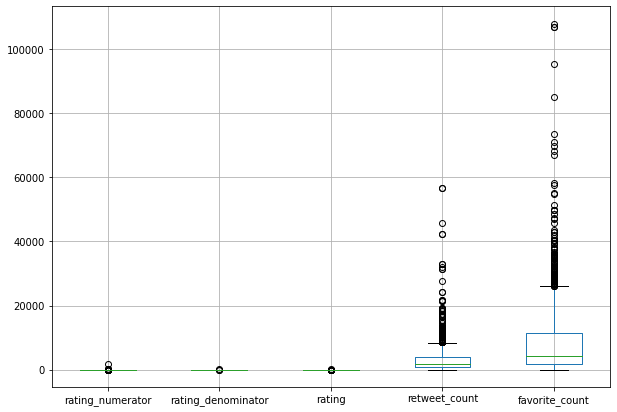

In [320]:
df_master.boxplot(figsize=(10,7))

<AxesSubplot:>

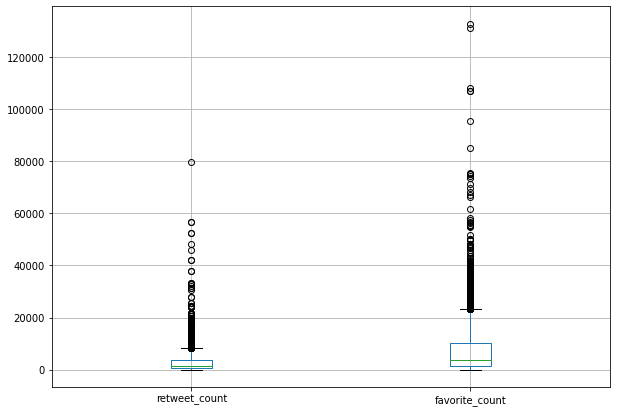

In [321]:
df_3_clean.boxplot(figsize=(10,7))

### box plot showing `favorite_count`(likes) and `retweet_count`

In [322]:
df_master.name.value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
              ..
Devón          1
Gert           1
Dex            1
Ace            1
Christoper     1
Name: name, Length: 931, dtype: int64

#### check for correlation between `likes` and `retweets`

<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

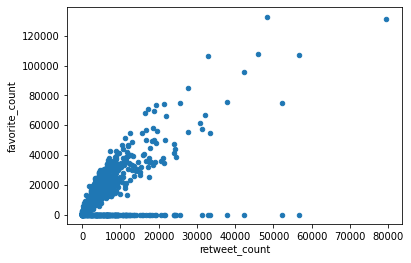

In [323]:
rt = np.array(df_3_clean.retweet_count.value_counts().values)
fav = np.array(df_3_clean.favorite_count.value_counts().values)
type(rt),type(fav)
df_3_clean.plot(x='retweet_count', y='favorite_count', kind='scatter')

##### This is an indicator of +ve correlation